#**BUS 458 HW3 - Hotel Reservations**
Azah Mansour, Livvy Brooks, Valerie Byrd

#🔗 Upload Data

---



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/Fall 25/BUS 458/Hotel Reservations.csv")
display(df.head())

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
print(df.isnull().sum())
print(df.dtypes)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64
Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int

# 🧹 Cleaning/Preparing for Modeling


## Identify categorical and numerical features

In [ ]:
df.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [ ]:
#  Display list of categorical columns
import numpy as np

cat_cols = [col for col in df.select_dtypes(exclude = np.number).columns]
cat_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

## Encode categorical variables


In [ ]:
# Convert categorical variables to one-hot encoded variables
# Note this will still include the numerical columns in df_encoded
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the new DataFrame with one-hot encoded variables
print(df_encoded.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 3  \
0             2               0 

#❓**Questions**

#❌ 1. Create a distribution of Booking Status. What percentage of bookings were canceled?

In [ ]:
booking_status_distribution = df['booking_status'].value_counts()
print("Distribution of Booking Status:")
print(booking_status_distribution)

canceled_percentage = (booking_status_distribution['Canceled'] / len(df)) * 100
print(f"\nPercentage of canceled bookings: {canceled_percentage:.2f}%")

Distribution of Booking Status:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Percentage of canceled bookings: 32.76%


#📋 2. Write Python code to create a training, validation, and test sets. What percentage of reservations where cancelled in each of the three sets of data (training, validation, and tests)?:

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features (X) and target (y)
X = df.drop(['Booking_ID', 'booking_status'], axis=1)
y = df['booking_status']

# Split data into training and the rest (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Split the rest into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Identify categorical columns (excluding 'Booking_ID' which was already dropped)
categorical_cols = X_train.select_dtypes(include='object').columns

# Apply one-hot encoding to the categorical columns in train, validation, and test sets
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure all sets have the same columns after encoding (important for consistent feature sets)
train_cols = X_train.columns
val_cols = X_val.columns
test_cols = X_test.columns

missing_in_val = set(train_cols) - set(val_cols)
for c in missing_in_val:
    X_val[c] = 0

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

# Reorder columns to match the training set
X_val = X_val[train_cols]
X_test = X_test[train_cols]


# Calculate and print cancellation percentages for each set
print("Cancellation percentage in Training Set:")
print((y_train.value_counts(normalize=True) * 100).loc['Canceled'].round(2))

print("\nCancellation percentage in Validation Set:")
print((y_val.value_counts(normalize=True) * 100).loc['Canceled'].round(2))

print("\nCancellation percentage in Test Set:")
print((y_test.value_counts(normalize=True) * 100).loc['Canceled'].round(2))

Cancellation percentage in Training Set:
32.76

Cancellation percentage in Validation Set:
32.76

Cancellation percentage in Test Set:
32.76


#🌳 3a. Decision Tree

In [ ]:
# Train a Decision Tree Classifier
# Import the necessary class
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7863542384562371
              precision    recall  f1-score   support

    Canceled       0.66      0.73      0.69      2377
Not_Canceled       0.86      0.81      0.84      4878

    accuracy                           0.79      7255
   macro avg       0.76      0.77      0.76      7255
weighted avg       0.79      0.79      0.79      7255



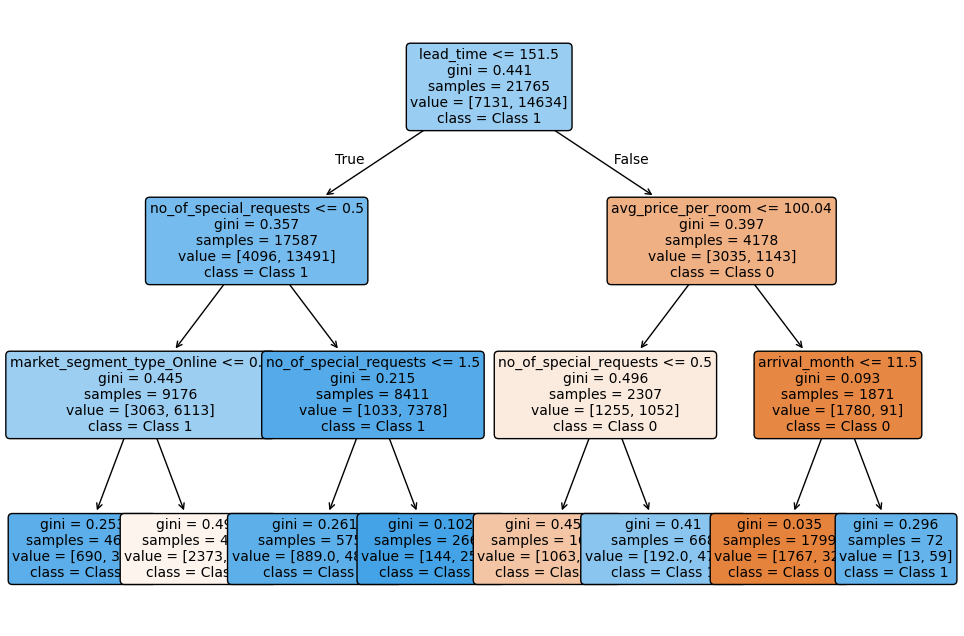

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clean_feature_names = [c.replace('&','and').replace('<','lt').replace('>','gt') for c in X_train.columns]

plt.figure(figsize=(12, 8))
plot_tree(
    tree,
    feature_names=clean_feature_names,
    class_names=['Class 0', 'Class 1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [ ]:
import pandas as pd

feat_importance = pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feat_importance.head(10))

lead_time                     0.503106
market_segment_type_Online    0.196149
no_of_special_requests        0.168627
avg_price_per_room            0.104897
arrival_month                 0.027221
no_of_weekend_nights          0.000000
no_of_week_nights             0.000000
arrival_year                  0.000000
no_of_children                0.000000
required_car_parking_space    0.000000
dtype: float64


##**Interpretation**: Customers who book far in advance, come through online channels, have fewer special requests, and pay higher prices are more likely to cancel

#📈 3b. Logistic Regression

In [ ]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Scale data to resolve ConvergenceWarning
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model  = LogisticRegression(random_state=42, solver='liblinear')

# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Text(70.58159722222221, 0.5, 'Actual')

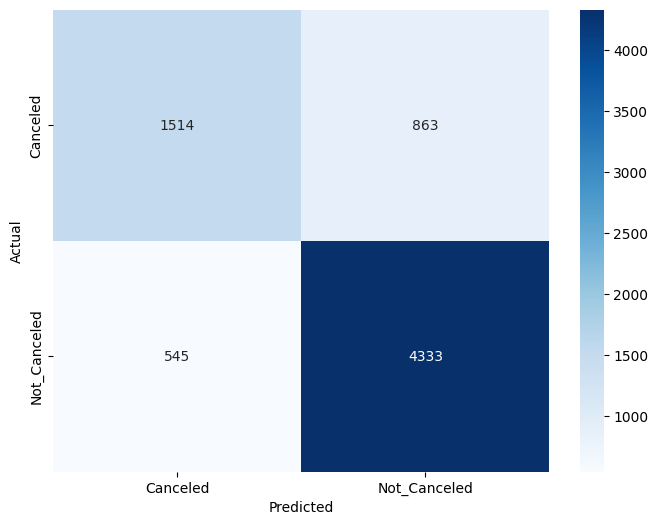

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # Changed import to specifically import pyplot
import seaborn as sns

# Make predictions on the test set
prediction = model.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Canceled', 'Not_Canceled'], yticklabels=['Canceled', 'Not_Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Print Classification report
print(classification_report(y_test, prediction))

NameError: name 'classification_report' is not defined

##**Interpretation**: Our model has a 74% precision rate for predicting cancellations. As a result, the hotel will minimize the occurance of overbooking, leading to higher customer satisfaction.

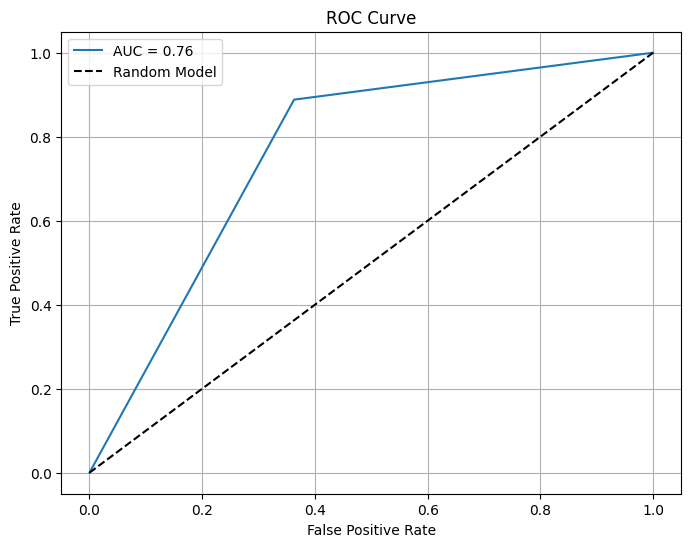

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert string labels to numerical labels (Canceled = 0, Not_Canceled = 1)
y_test_numeric = np.where(y_test == 'Canceled', 0, 1)
prediction_numeric = np.where(prediction == 'Canceled', 0, 1)


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, prediction_numeric)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

##**Interpretation**: Our model's AUC is .76, indicating that it is better at predicting true cancellations than a random model, in which the AUC is .5. For hotel reservations, our model will enable process improvements by allowing managers to accurately adjust inventory, staff, and cleaning schedules.

#🎒 3c. Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Initialize and train the Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging Classifier
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

Bagging Classifier Accuracy: 0.8898690558235699
              precision    recall  f1-score   support

    Canceled       0.84      0.82      0.83      2377
Not_Canceled       0.91      0.92      0.92      4878

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



##**Interpretation**: The classification report provides a more in-depth look for each class (canceled or no canceled).

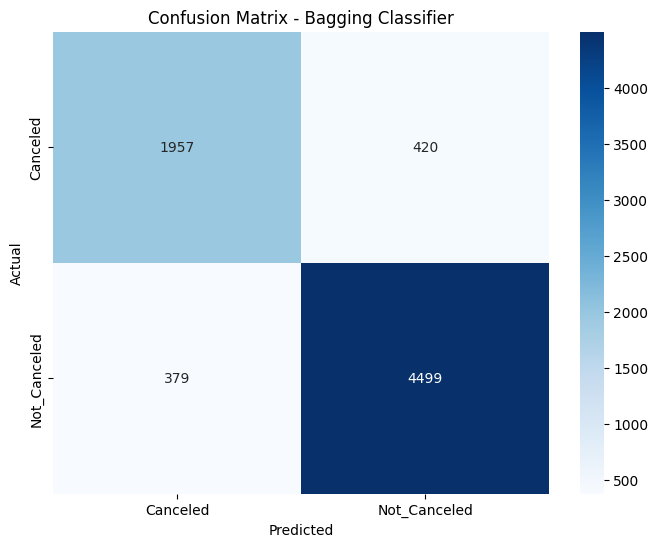

In [ ]:
# Confusion Matrix for Bagging Classifier
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', xticklabels=['Canceled', 'Not_Canceled'], yticklabels=['Canceled', 'Not_Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bagging Classifier')
plt.show()

##**Interpretation**: The confusion matrix for the bagging classifier shows the number of correct vs incorrect predictions for each class (canceled or not canceled). 1957 were correctly predicted as canceled. 420 were incorrectly predicted as not canceled. 379 were incorrectly predicted as canceled. 4499 were correctly predicted as not canceled.

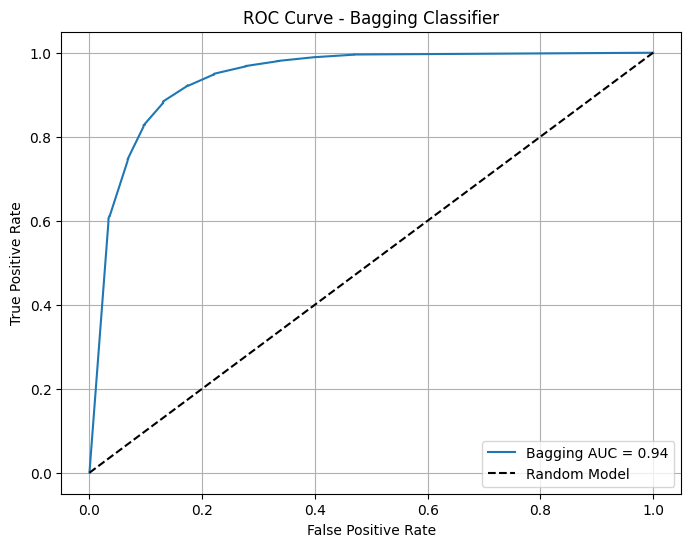

In [ ]:
# ROC Curve for Bagging Classifier
# Convert string labels to numerical labels for ROC curve calculation
y_test_numeric_bagging = np.where(y_test == 'Canceled', 0, 1)
y_pred_prob_bagging = bagging_model.predict_proba(X_test)[:, 1] # Probability of the positive class (Not_Canceled)

# Calculate ROC curve
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test_numeric_bagging, y_pred_prob_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging, tpr_bagging, label=f'Bagging AUC = {roc_auc_bagging:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Classifier')
plt.legend()
plt.grid(True)
plt.show()

##**Interpretation**: The ROC curve shows the true positive rate against the false positive rate at different threshold settings. The Area Under the Curve (AUC) represents the model's ability to distinguish between the positive and negative results. The higher the AUC, the better the model performed.

#🔎 4. Model Comparison

In [ ]:
# Summary table of the KPIs for each model

# Pull KPIs for Decision Tree
tree_report = classification_report(y_test, y_pred_tree, output_dict=True)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = tree_report['Canceled']['precision']
tree_recall = tree_report['Canceled']['recall']
tree_f1 = tree_report['Canceled']['f1-score']

# ROC AUC for Decision Tree (need to calculate probability scores first)
from sklearn.metrics import roc_auc_score

# Decision tree probability of Canceled class
y_pred_prob_tree = tree.predict_proba(X_test)[:, list(tree.classes_).index('Canceled')]
tree_roc_auc = roc_auc_score(y_test, y_pred_prob_tree)


# Pull KPIs for Logistic Regression
lr_report = classification_report(y_test, prediction, output_dict=True)
lr_accuracy = accuracy_score(y_test, prediction)
lr_precision = lr_report['Canceled']['precision']
lr_recall = lr_report['Canceled']['recall']
lr_f1 = lr_report['Canceled']['f1-score']


# Probability scores for the positive class (Canceled)
y_pred_prob_lr = model.predict_proba(X_test_scaled)[:, list(model.classes_).index('Canceled')]

# ROC AUC for Logistic Regression
lr_roc_auc = roc_auc_score(y_test, y_pred_prob_lr)


# Pull KPIs for Bagging
bagging_report = classification_report(y_test, y_pred_bagging, output_dict=True)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
bagging_precision = bagging_report['Canceled']['precision']
bagging_recall = bagging_report['Canceled']['recall']
bagging_f1 = bagging_report['Canceled']['f1-score']

# ROC AUC for Bagging
bagging_roc_auc = roc_auc_bagging


# Organize KPIs
summary_data = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Bagging'],
    'Accuracy': [tree_accuracy, lr_accuracy, bagging_accuracy],
    'Precision (Canceled)': [tree_precision, lr_precision, bagging_precision],
    'Recall (Canceled)': [tree_recall, lr_recall, bagging_recall],
    'F1-score (Canceled)': [tree_f1, lr_f1, bagging_f1]
}

# Summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary table
display(summary_df)

,Model,Accuracy,Precision (Canceled),Recall (Canceled),F1-score (Canceled)
0,Decision Tree,0.786354,0.655276,0.734119,0.692460
1,Logistic Regression,0.805927,0.735308,0.636937,0.682597
2,Bagging,0.889869,0.837757,0.823307,0.830469


##**Model KPI Analysis**
 ---
## ▶ Accuracy

🥇: Bagging Classifier (.89)

🥈: Logistic Regression (.81)

🥉: Decision Tree (.79)


## ▶ Precision

🥇: Bagging Classifier (.82)

🥈: Decision Tree (.73)

🥉: Logistic Regression (.64)


## ▶ Recall

🥇: Bagging Classifier(.84)

🥈: Logistic Regression (.74)

🥉: Decision Tree (.66)


## ▶ F1-Score

🥇: Bagging Classifier(.83)

🥈: Decision Tree (.69)

🥉: Logistic Regression (.68)


#**🏆 Winner: Bagging Classifier Model**
Our KPI analysis shows the Bagging Classifier consistently achieved the highest Accuracy, Precision, Recall, and F1-Score rates, indicating the best performance on the hold out data.

Heres a quick rundown of what this tells us about the Bagging Classifier's performance


*   **Accuracy**: Overall, 89% of the model's predictions were correct
*   **Precision**: Of all the model's "Canceled" predictions, 82% were correct
*   **Recall**: The model found 84% of all the actual canceled reservations
*   **F1-Score**: Since the F1-Score is 83% and close to the precision (82%) and recall (84%), the model has a good balance between predicting positives without too many false positives

# 🌟 5. Based on the models you created, what are major insights? What variables are important in predicting which customers are likely to cancel? What characteristics of the stay impact the likelihood customers cancel the reservation? What are the general business insights gleaned from these model builds?

##Major Insights
The Bagging Classifier performed the best, with 89% accuracy, 82% precision, and 84% recall. This shows that combining multiple models improves prediction accuracy compared to single models like the Decision Tree or Logistic Regression.

##Important Variables

From the Decision Tree model, the most important features were **lead time**, **market segment type (Online)**, **number of special requests**, and **average price per room**.
Customers who book far in advance, come through online channels, have fewer special requests, and pay higher prices are more likely to cancel.

##Characteristics of the Stay

Booking behavior matters more than trip details. Factors such as the **timing** and **channel of booking** have greater influence on cancellations than the number of nights or guests.

##Business Insights

Hotels can reduce cancellations by monitoring long lead times and online bookings more closely. Strategies like requiring deposits, offering flexible rates, or targeted communication to high-risk customers could help improve forecasting, minimize overbooking, and optimize staffing.

#✍️ 6. Please describe how you might use this model to generate business value in your hotel chain

This model can help the hotel chain create business value by predicting which reservations are most likely to be canceled. By identifying high-risk bookings early, hotel managers can take proactive steps such as requiring deposits, sending reminder emails, or offering incentives to confirm stays. This reduces last-minute cancellations and improves occupancy forecasting.

The insights from the model can also guide pricing and marketing strategies. For example, customers with long lead times or online bookings could be targeted with flexible rate options, while loyal or corporate guests might receive special offers to encourage repeat business.

Overall, the model supports better decision-making and resource planning which can help hotels optimize room inventory, staffing schedules, and revenue management while improving customer satisfaction and reducing financial losses from cancellations.

#Contributions

Valerie Byrd: Uploaded & cleaned data, created decision tree, contributed to questions

Azah Mansour: Created logistic regression model, contributed to questions

Livvy Brooks: Created bagging model, contributed to questions